This notebook serves as a working example of how to load the files produced by the ``sift-features.py`` script.

In [16]:
DATA_FILE = '../../../meng/notebooks/bracelets/2013T805_Woolaston_Gloucestershire/SetA/features/IMG_3698_features.npz'

In [17]:
import cv2                                                        
import numpy as np                                                
                                                                  
contents = np.load(DATA_FILE)                           
                                                                  
def make_kp(kp_location, kp_data, kp_attrs):                      
    x, y = kp_location                                            
    data = dict(('_' + a, v) for a, v in zip(kp_attrs, kp_data))  
    return cv2.KeyPoint(x, y, **data)                          
                                                                  
keypoints = [                                                     
    make_kp(loc, dat, contents['keypoint_fields']) for loc, dat in
    zip(contents['keypoint_locations'], contents['keypoint_data'])
]                                                                 
descriptors = contents['descriptors']                             

print('Metadata:')
for md in 'image_path', 'image_sha256', 'mask_path', 'mask_sha256':
    print('{}: {}'.format(md, contents[md]))

Metadata:
image_path: /volumes/meng/notebooks/bracelets/2013T805_Woolaston_Gloucestershire/SetA/IMG_3698.JPG
image_sha256: d25982f3d9be502c345732a08a18dcfddebb26635d519fac39de7c44aa90c02e
mask_path: /volumes/meng/notebooks/bracelets/2013T805_Woolaston_Gloucestershire/SetA/masks/IMG_3698_mask.JPG
mask_sha256: 6d71e420609bf7a46f3aaa1f4726a8be7fb103244045de3b73b4eb0cc62633ae


In [18]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [19]:
pts = np.asarray([k.pt for k in keypoints])

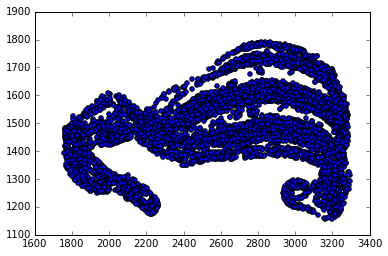

In [20]:
scatter(pts[:,0], pts[:,1])

(array([  552.,   787.,   984.,   625.,   524.,   520.,   803.,  1231.,
          597.,   498.]),
 array([ -3.14116122e+00,  -2.51310315e+00,  -1.88504507e+00,
         -1.25698700e+00,  -6.28928927e-01,  -8.70853676e-04,
          6.27187220e-01,   1.25524529e+00,   1.88330337e+00,
          2.51136144e+00,   3.13941951e+00]),
 <a list of 10 Patch objects>)

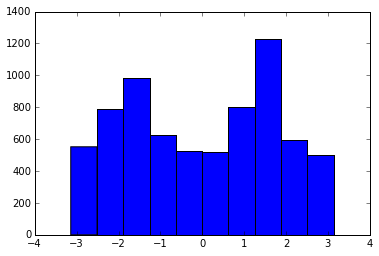

In [21]:
hist(np.deg2rad([k.angle - 180 for k in keypoints]))